In [2]:
# SINGLE LINEAR REGRESSION

# y=mx+c, where y=dependent variable, x=independent variable, m=slope/coefficient, c=intercept

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df=pd.read_csv('SAT vs GPA.csv')
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
SAT    84 non-null int64
GPA    84 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [6]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [7]:
df.shape

(84, 2)

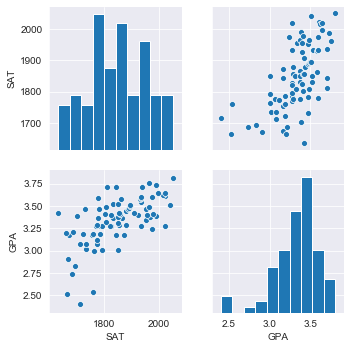

In [8]:
sns.pairplot(df)

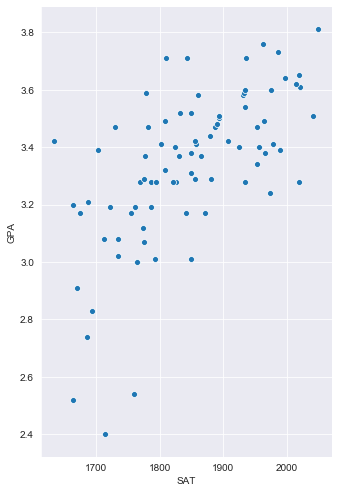

In [9]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['SAT'], y_vars='GPA',size=7, aspect=0.7, kind='scatter')

In [11]:
# Putting feature variable to X
X=df['SAT']

# Print 5 rows
X.head()

0    1714
1    1664
2    1760
3    1685
4    1693
Name: SAT, dtype: int64

In [14]:
# Putting feature variable to Y
y=df['GPA']

# Print 5 rows
y.head()

0    2.40
1    2.52
2    2.54
3    2.74
4    2.83
Name: GPA, dtype: float64

In [15]:
# SPLITTING DATA INTO TRAINING AND TESTING

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=200)
# train_size can be 0.7 or 0.8 and random_state can be any number

In [16]:
# To find the 'type' of the variables
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [17]:
# Since we're handling with only 'one column', it is a series and we use NUMPUY (this is for single LR)

X_train = X_train[:,np.newaxis]  #X_train becomes numpy array(because it is in series,we convert it to numpy array)
X_test = X_test[:,np.newaxis]

In [19]:
print(X_train.shape)  # 67 rows and 1 column
print(X_test.shape)   # 17 rows and 1 column
print(y_train.shape)  # 67 rows 
print(y_test.shape)   # 17 rows 

# this means in total of 84 data, 67 datas are given for training and 17 datas are given for testing

(67, 1)
(17, 1)
(67,)
(17,)


In [20]:
# IMPORT LINEAR_REGRESSION FROM SKLEARN
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr (i.e., creating an object for LinearRegression)
lr=LinearRegression()

In [21]:
# fit() function is used to 'train' the model
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# TO CALCULATE THE COEFFICIENTS

#print the intercepts and coefficients
print(lr.intercept_)   # c value
print(lr.coef_)        # m value

0.14974887860874508
[0.00173287]


In [24]:
X_test[0]

array([2015], dtype=int64)

In [25]:
y_test    # actual value

75    3.62
50    3.41
44    3.39
36    3.32
60    3.49
38    3.37
40    3.37
9     3.01
67    3.54
19    3.19
34    3.29
2     2.54
29    3.28
10    3.02
28    3.28
59    3.48
17    3.17
Name: GPA, dtype: float64

In [27]:
# PREDICTIONG THE VALUES

y_pred=lr.predict(X_test)
type(y_pred)
y_pred

array([3.64148455, 3.27238296, 3.59816277, 3.28278019, 3.55310811,
       3.22906118, 3.38155386, 3.35556079, 3.50112198, 3.24465702,
       3.40754693, 3.19960237, 3.25851999, 3.15628059, 3.65014891,
       3.42660851, 3.05057544])

In [35]:
print(y_test.shape)
print(y_pred.shape)

(17,)
(17,)


In [39]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [40]:
r_squared = r2_score(y_test, y_pred)

In [41]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.04906220919829462
r_square_value : 0.18429109568833169


Text(0, 0.5, 'Predicted Y')

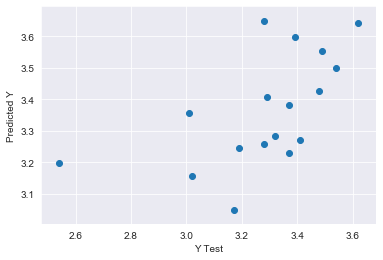

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')